In [18]:
import os
import requests
from datetime import datetime

# URL for the Monthly GDP dataset
MONTHLY_GDP_URL = "https://www.ons.gov.uk/generator?uri=/economy/grossdomesticproductgdp/bulletins/gdpmonthlyestimateuk/september2024/821ce2e1&format=csv"

# Directory to save the dataset
SAVE_DIR = "/content/ons_data"

# Fetch function
def fetch_monthly_gdp():
    if not os.path.exists(SAVE_DIR):
        os.makedirs(SAVE_DIR)

    try:
        print("Fetching Monthly GDP data...")
        response = requests.get(MONTHLY_GDP_URL, timeout=10)
        response.raise_for_status()  # Check for request success
        # Save with a timestamped filename
        file_path = os.path.join(SAVE_DIR, f"monthly_gdp_{datetime.now().strftime('%Y%m%d')}.csv")
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"Monthly GDP data saved to {file_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching Monthly GDP data: {e}")

# Fetch the data once to test
fetch_monthly_gdp()


Fetching Monthly GDP data...
Monthly GDP data saved to /content/ons_data/monthly_gdp_20241213.csv


In [19]:
import pandas as pd

# Load the Monthly GDP data
file_path = '/content/ons_data/monthly_gdp_20241213.csv'  # Adjust filename if needed
gdp_data = pd.read_csv(file_path)




In [20]:
# Remove rows with metadata, notes, and non-relevant information
gdp_data_clean = gdp_data[~gdp_data['Unnamed: 1'].str.contains("Monthly index|Notes|Unit", na=False)]

# Reset the index for the cleaned dataframe
gdp_data_clean = gdp_data_clean.reset_index(drop=True)

# Check the first few rows after cleaning
gdp_data_clean.head()


,"Figure 1: UK gross domestic product (GDP) is estimated to have fallen by 0.1% in September 2024, but increased by 0.1% in the three months to September 2024",Unnamed: 1
0,"Monthly index, January 2007 to September 2024,...",NaN
1,NaN,NaN
2,Notes,NaN
3,Unit,"Index, 2022 = 100"
4,NaN,NaN


In [21]:
# Set the correct column names (assuming first row contains the column names)
gdp_data_clean.columns = ['Date', 'GDP']

# Inspect the cleaned dataset
gdp_data_clean.head()


,Date,GDP
0,"Monthly index, January 2007 to September 2024,...",NaN
1,NaN,NaN
2,Notes,NaN
3,Unit,"Index, 2022 = 100"
4,NaN,NaN


In [27]:
# Convert 'Date' column to datetime format
gdp_data_clean['Date'] = pd.to_datetime(gdp_data_clean['Date'], errors='coerce')

# Drop rows with missing or invalid 'Date' or 'GDP' values
gdp_data_clean = gdp_data_clean.dropna(subset=['Date', 'GDP'])

# Check cleaned data
gdp_data_clean.head()


,Date,GDP
6,2007-01-01,82.9
7,2007-02-01,83.2
8,2007-03-01,83.3
9,2007-04-01,83.5
10,2007-05-01,83.9


In [28]:
# Check for missing values
gdp_data_clean.isnull().sum()

# Convert the date column to datetime format (if applicable)
gdp_data_clean['Date'] = pd.to_datetime(gdp_data_clean['Date'])

# Check data types and format
gdp_data_clean.dtypes

# Drop any rows with missing values (if necessary)
gdp_data_clean = gdp_data_clean.dropna()


In [29]:
# Check the column names in the dataframe
print(gdp_data_clean.columns)

Index(['Date', 'GDP'], dtype='object')


In [31]:
# Convert the 'GDP' column to numeric, forcing errors to NaN
gdp_data_clean['GDP'] = pd.to_numeric(gdp_data_clean['GDP'], errors='coerce')

# Check the first few rows after conversion
print(gdp_data_clean.head())


         Date   GDP
6  2007-01-01  82.9
7  2007-02-01  83.2
8  2007-03-01  83.3
9  2007-04-01  83.5
10 2007-05-01  83.9


In [32]:
# Calculate the monthly growth rate (percentage change)
gdp_data_clean['Growth Rate'] = gdp_data_clean['GDP'].pct_change() * 100

# Check the result
gdp_data_clean.head()


,Date,GDP,Growth Rate
6,2007-01-01,82.9,NaN
7,2007-02-01,83.2,0.361882
8,2007-03-01,83.3,0.120192
9,2007-04-01,83.5,0.240096
10,2007-05-01,83.9,0.479042


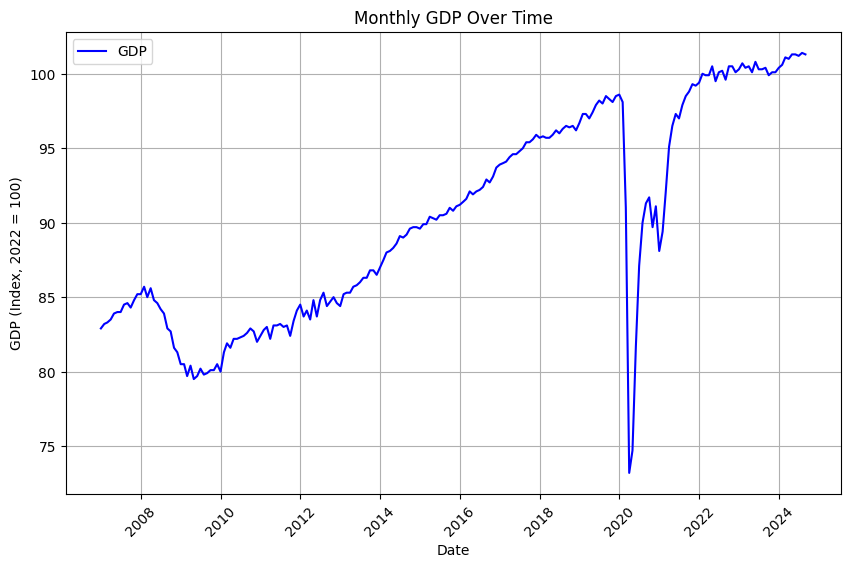

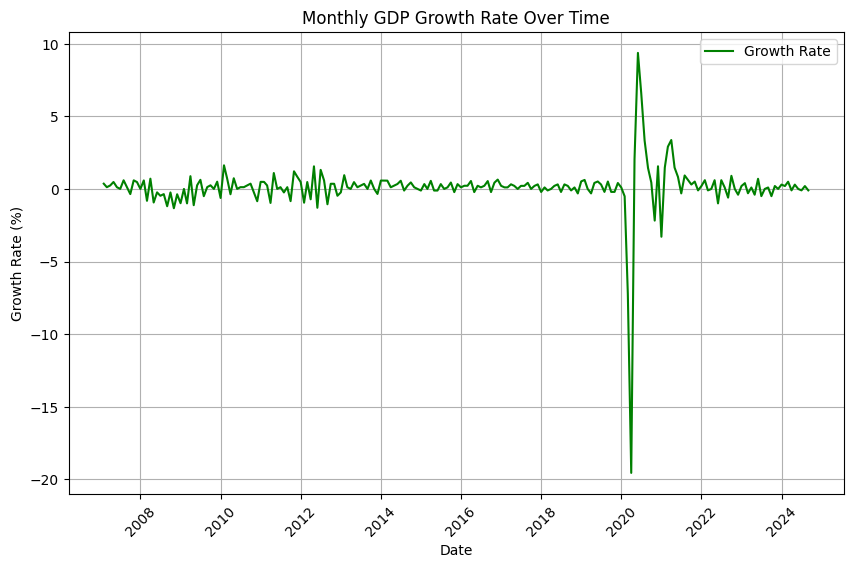

In [33]:
import matplotlib.pyplot as plt

# Plot GDP
plt.figure(figsize=(10, 6))
plt.plot(gdp_data_clean['Date'], gdp_data_clean['GDP'], label='GDP', color='blue')
plt.xlabel('Date')
plt.ylabel('GDP (Index, 2022 = 100)')
plt.title('Monthly GDP Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot Growth Rate
plt.figure(figsize=(10, 6))
plt.plot(gdp_data_clean['Date'], gdp_data_clean['Growth Rate'], label='Growth Rate', color='green')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.title('Monthly GDP Growth Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [34]:
# Check for missing values in GDP
print(gdp_data_clean['GDP'].isnull().sum())


0


In [35]:
# Save the cleaned data to a CSV file
gdp_data_clean.to_csv('cleaned_gdp_data.csv', index=False)
